In [1]:
from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
from machine_modifications.random_graph_functions import *
import networkx as nx
import numpy as np
import math

In [2]:
# Objective is to minimize MRT + E
mrt = True
tie_breaking_rule = 2
plot = False


max_counter = 10
#num_task_lst = [1, 2, 5, 10, 15]
num_task_lst = np.arange(1, 200, 10)
# min_lb_lst = []
#num_machine_lst = [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 50]
 

opt_obj_lst = []
obj_lb_lst = []
obj_ub_lst = []

num_tasks = 100

for num_tasks in num_task_lst:
    
    min_lb = float('inf')
    max_ub = -float('inf')
    
    opt_obj = []
    
    max_overall_ratio = - np.infty
    counter = 0
    
    print("On " + str(num_tasks))
    
    while counter != max_counter:
        
        print("Test " + str(counter) )
        # Random
        
        seed=random.randint(0, 100000)
        edges = num_tasks - 1
        num_machines = random.randint(1, num_tasks)
        G = random_dag(num_tasks, edges, seed=seed)
        
        w = [1 for _ in range(num_tasks)]
        s = [1 for _ in range(num_tasks)]

        # Get ordering using modified ETF
        test = Mod_ETF(G, w, s, num_machines, tie_breaking_rule, plot=plot)

    #     # Initialize objective function value
        heuristic_opt = test.obj_value

        # Get pseudosize, convert to speed
        psize, group_interval = approx_psize_homogeneous(G, test.order, test.h, test.t, verbose=False)
        s_prime = psize_to_speed(psize)

        # Get ordering using modified ETF
        test2 = Mod_ETF(G, w, s_prime, num_machines, tie_breaking_rule, plot=plot)

        # Check if the objective function value has improved
        if heuristic_opt > test2.obj_value:
            heuristic_opt = test2.obj_value
            s = s_prime

        temp = get_objective_single_ordering(mrt, G, w, test.order, plot=plot, compare=False)
        opt_intervals, s_opt, obj_opt, _ = temp 
        
        if s_opt[0] != -1:
            
            counter += 1

            lb_speeds = psize_to_speed(lb_lst_precise(G, num_machines, test.order, num_concurrent_running_tasks(num_tasks, group_interval)))
            lb_heuristic = Mod_ETF(G, w, lb_speeds, num_machines, tie_breaking_rule, plot=plot)
            obj_lb_lst.append([num_tasks, lb_heuristic.obj_value])
            
            ub_speeds = psize_to_speed(ub_lst_graph(G, test.order))
            ub_heuristic = Mod_ETF(G, w, ub_speeds, num_machines, tie_breaking_rule, plot=plot)
            obj_ub_lst.append([num_tasks, ub_heuristic.obj_value])

            opt_obj_lst.append([num_tasks, obj_opt])
            
            print(round(obj_opt, 1), round(ub_heuristic.obj_value, 1))
            print(round(obj_opt, 1) <= round(ub_heuristic.obj_value, 1))
            
           
        else:
            
            print("SKIP THIS ONE")
    
    
    
   
    
   

On 1
Test 0
2.0 2.0
True
Test 1
2.0 2.0
True
Test 2
2.0 2.0
True
Test 3
2.0 2.0
True
Test 4
2.0 2.0
True
Test 5
2.0 2.0
True
Test 6
2.0 2.0
True
Test 7
2.0 2.0
True
Test 8
2.0 2.0
True
Test 9
2.0 2.0
True
On 11
Test 0
31.8 32.0
True
Test 1
31.4 32.2
True
Test 2
43.3 41.7
False
Test 3
35.1 35.9
True
Test 4
30.3 31.0
True
Test 5
29.6 30.8
True
Test 6
32.7 32.8
True
Test 7
34.3 34.7
True
Test 8
35.8 36.0
True
Test 9
33.9 35.1
True
On 21
Test 0
66.9 69.1
True
Test 1
68.8 71.6
True
Test 2
56.3 58.3
True
Test 3
61.3 64.1
True
Test 4
67.5 67.9
True
Test 5
63.4 66.3
True
Test 6
58.1 60.6
True
Test 7
62.6 65.7
True
Test 8
77.6 78.5
True
Test 9
74.2 76.0
True
On 31
Test 0
105.0 111.7
True
Test 1
93.4 100.1
True
Test 2
SKIP THIS ONE
Test 2
106.1 112.8
True
Test 3
96.6 99.8
True
Test 4
107.9 111.9
True
Test 5
95.1 98.3
True
Test 6
118.9 122.9
True
Test 7
110.6 115.5
True
Test 8
141.5 149.2
True
Test 9
97.5 103.6
True
On 41
Test 0
125.6 133.9
True
Test 1
175.1 181.5
True
Test 2
127.9 143.2
True
Tes

In [3]:
import matplotlib.pyplot as plt
import math

opt_obj_lst = np.array(opt_obj_lst)
obj_lb_lst = np.array(obj_lb_lst)
obj_ub_lst = np.array(obj_ub_lst)

ub_over_obj_metric = obj_ub_lst / opt_obj_lst
lb_over_obj_metric = obj_lb_lst / opt_obj_lst

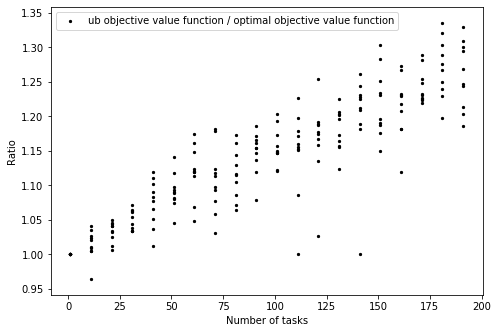

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.scatter(obj_ub_lst[:,0], ub_over_obj_metric[:,1],s=5,  label='ub objective value function / optimal objective value function', color="k")
# plt.scatter(obj_lb_lst[:,0], lb_over_obj_metric[:,1],s=5,  label='lb / optimal objective value function', color="r")

plt.xlabel('Number of tasks')
plt.ylabel('Ratio')
plt.legend()
plt.show()

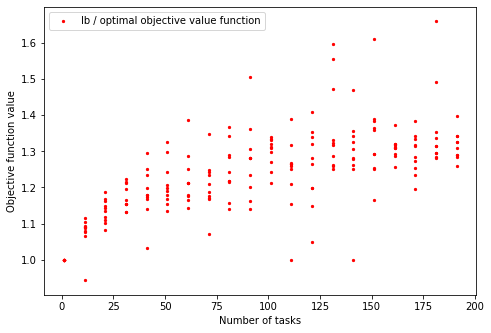

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.scatter(obj_lb_lst[:,0], lb_over_obj_metric[:,1],s=5,  label='lb / optimal objective value function', color="r")
plt.xlabel('Number of tasks')
plt.ylabel('Objective function value')
plt.legend()
plt.show()